# Misc

## 171. Excel Sheet Column Number

Given a column title as appear in an Excel sheet, return its corresponding column number.

In [ ]:
import string

def titleToNumber(s):
    digit = dict(zip(string.ascii_uppercase, range(1, 27)))
    res = 0
    for c in s:
        res = 26*res + digit[c]
        
    return res
        
titleToNumber('ZZ')

## 206. Reverse Linked List
Easy

Reverse a singly linked list.

Example:

    Input: 1->2->3->4->5->NULL
    Output: 5->4->3->2->1->NULL

Follow up:

A linked list can be reversed either iteratively or recursively. Could you implement both?


In [3]:
class ListNode:
    def __init__(self, val=0, next=None): 
        self.val = val
        self.next = next
        
def reverseList_(head):    # recursive solution from LeetCode
    if head is None or head.next is None:
        return head
    else:
        res = reverseList(head.next)
        head.next.next = head
        head.next = None
        return res

def reverseList(head):   # iterative
    res = None
    while head:
        res = ListNode(val=head.val, next=res)
        head = head.next
        
    return res

def list2arr(head):
    res = []
    while head:
        res.append(head.val)
        head = head.next
    return res

head = ListNode(val=1, 
            next=ListNode(val=2, 
                next=ListNode(val=3, 
                    next=ListNode(val=4, 
                        next=ListNode(val=5, next=None)))))

print(list2arr(head))
print(list2arr(reverseList(head)))

[1, 2, 3, 4, 5]
[5, 4, 3, 2, 1]


## 46. Permutations
Medium

Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.

Example 1:

    Input: nums = [1,2,3]
    Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

Constraints:

    1 <= nums.length <= 6
    -10 <= nums[i] <= 10
    All the integers of nums are unique.

In [12]:
nums = [1, 2, 3]

def permute(nums):
    '''
    assuming no duplicates in the input list
    '''
    if not nums:
        return [nums]
    else:
        res = []
        for i, n in enumerate(nums):
            for l in permute(nums[:i] + nums[i+1:]):
                res.append([n]+l)
        return res

permute(nums)

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

## 144. Binary Tree Preorder Traversal

Medium

Given the root of a binary tree, return the preorder traversal of its nodes' values.

Example 1:

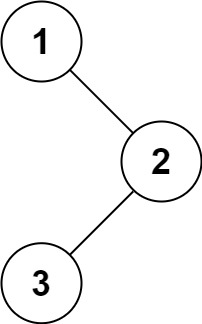

    Input: root = [1,null,2,3]
    Output: [1,2,3]

Constraints:

    The number of nodes in the tree is in the range [0, 100].
    -100 <= Node.val <= 100

In [6]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def preorderTraversal(root):
    if not root:
        return []
    else:
        return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right)

## 226. Invert Binary Tree

Easy

Invert a binary tree.

Example:

Input:

         4
       /   \
      2     7
     / \   / \
    1   3 6   9

Output:

         4
       /   \
      7     2
     / \   / \
    9   6 3   1

Trivia:
This problem was inspired by this original tweet by Max Howell:

    Google: 90% of our engineers use the software you wrote (Homebrew), but you can’t invert a binary tree on a whiteboard so f*** off.



In [5]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def invertTree(root):
    if root:
        root.left, root.right = invertTree(root.right), invertTree(root.left)
    return root

## 559. Maximum Depth of N-ary Tree

Easy

Given a n-ary tree, find its maximum depth.

The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

Nary-Tree input serialization is represented in their level order traversal, each group of children is separated by the null value (See examples).

Example 1:

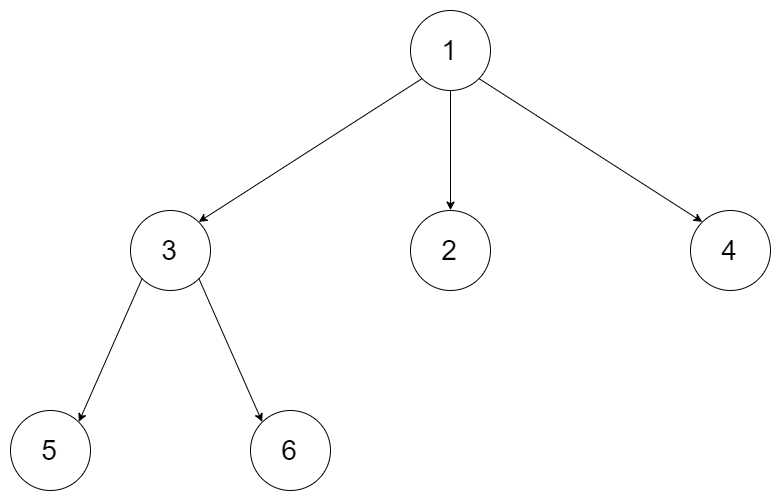

    Input: root = [1,null,3,2,4,null,5,6]
    Output: 3 

Constraints:

    The depth of the n-ary tree is less than or equal to 1000.
    The total number of nodes is between [0, 104].

In [ ]:
# recursive solution

"""
# Definition for a Node.
class Node:
    def __init__(self, val=None, children=None):
        self.val = val
        self.children = children
"""

def maxDepth(root):
    if not root:
        return 0
    elif not root.children:
        return 1
    else:
        return 1 + max(maxDepth(node) for node in root.children)

In [ ]:
# BFS solution stolen from LeetCode

def maxDepth(root):
    if not root:
        return 0

    qu = [root]
    lv = 0
    while qu:
        for _ in range(len(qu)):
            cur = qu.pop(0)
            if cur.children:
                for ch in cur.children:
                    qu.append(ch)
        lv+=1
        
    return lv

## 102. Binary Tree Level Order Traversal

Medium

Given a binary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).

For example:
Given binary tree [3,9,20,null,null,15,7],

        3
       / \
      9  20
        /  \
       15   7

return its level order traversal as:

    [
      [3],
      [9,20],
      [15,7]
    ]


In [ ]:
# BFS
#
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

from collections import deque

def levelOrder(root):
    q = deque()
    res = []

    if root:
        q.append(root)

    while q:
        level = []
        for _ in range(len(q)):
            root = q.popleft()
            level.append(root.val)
            if root.left:
                q.append(root.left)
            if root.right:
                q.append(root.right)

        res.append(level)
    return res

## 107. Binary Tree Level Order Traversal II

Easy

Given a binary tree, return the bottom-up level order traversal of its nodes' values. (ie, from left to right, level by level from leaf to root).

For example:
Given binary tree [3,9,20,null,null,15,7],

        3
       / \
      9  20
        /  \
       15   7

return its bottom-up level order traversal as:

    [
      [15,7],
      [9,20],
      [3]
    ]


In [ ]:
# BFS 解答跟上面那題一模一樣只是 return res[::-1]
# LeetCode 上速度前幾名的 BFS 解答都是這樣做的

# 這題也可以用 recursion